### Imported libreries

In [1]:
# Data manipulation

import pandas as pd
import numpy as np
import json
import pickle
import math

# Data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Feature engineering & model preparation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest

# Functions
from utils import *

### 1. Data collection

In [2]:
df = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv")

df.to_excel("../data/raw/df.xlsx", index = False)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Description and types of Data**

- `Pregnancies` --> Number of pregnancies in the patient (numerical)

- `Glucose` --> Plasma glucose concentration 2 hours after an oral glucose tolerance test (numerical)

- `BloodPressure` --> Diastolic blood pressure (measured in mm Hg) (numerical)

- `SkinThickness` --> Triceps skinfold thickness (measured in mm) (numerical)

- `Insulin` --> 2-hour serum insulin (measured in mu U/ml) (numerical)

- `BMI` --> Body mass index (numerical)

- `DiabetesPedigreeFunction` --> Diabetes pedigree function (numerical)

- `Age` --> Patient's age (numerical)

- `Outcome` --> Class variable (0 or 1), where 0 is negative for diabetes and 1 is positive (numerical)

### 2. Exploration anda data cleaning

In [3]:
target = "Outcome"

rows, columns = df.shape
print(f"The dimensions of this dataset are {rows} rows and {columns} columns")

The dimensions of this dataset are 768 rows and 9 columns


In [4]:
# Information about the data types and non-null values
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Visualization of null values

In [5]:
missing_df = missing_values_summary(df)
missing_df

No missing values were found in the dataset.


""


In [6]:
unknown_df = unknown_values_summary(df, "unknown")
unknown_df

There are no unknown values in the dataset.


""


**Conclusions:**

- The dataset contains 768 rows and 9 columns, where each row represents a patient and each column describes demographic and physiological characteristics, along with the target variable `Outcome`, which indicates whether the patient has diabetes (1) or not (0).

- There are no missing or unknown values in the dataset, and all features are numerical, which simplifies the data cleaning and preprocessing steps.

- Variables such as `Glucose`, `BMI`, and `Age` are likely to have a significant influence on the outcome, as they are directly related to diabetes risk. Other features like `Insulin` levels and `BloodPressure` may also contribute to the prediction but perhaps with less weight.

#### Visualization of duplicatied values

In [7]:
filt_df = remove_duplicates(df)

filt_df.head()

Number of duplicate rows: 0
No duplicates found.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Drop irrelevant variables

In [8]:

"""filt_df.drop(["duration"], axis= 1, inplace= True)
filt_df.info()"""

'filt_df.drop(["duration"], axis= 1, inplace= True)\nfilt_df.info()'

### 3. Analysis of univariate variables

#### Categorical variables

In [9]:


cat_cols = filt_df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = filt_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for i in range(0, len(cat_cols), 2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.countplot(ax=axes[0], data=filt_df, x=cat_cols[i], order=filt_df[cat_cols[i]].value_counts().index)
    axes[0].tick_params(axis='x', rotation=45)

    
    if i+1 < len(cat_cols):
        sns.countplot(ax=axes[1], data=filt_df, x=cat_cols[i+1], order=filt_df[cat_cols[i+1]].value_counts().index)
        axes[1].tick_params(axis='x', rotation=45)
    else:
        axes[1].axis("off")
    
    plt.tight_layout()
    plt.show()

if not cat_cols:
    print("There are no categorical features")

There are no categorical features


#### Numeric variables

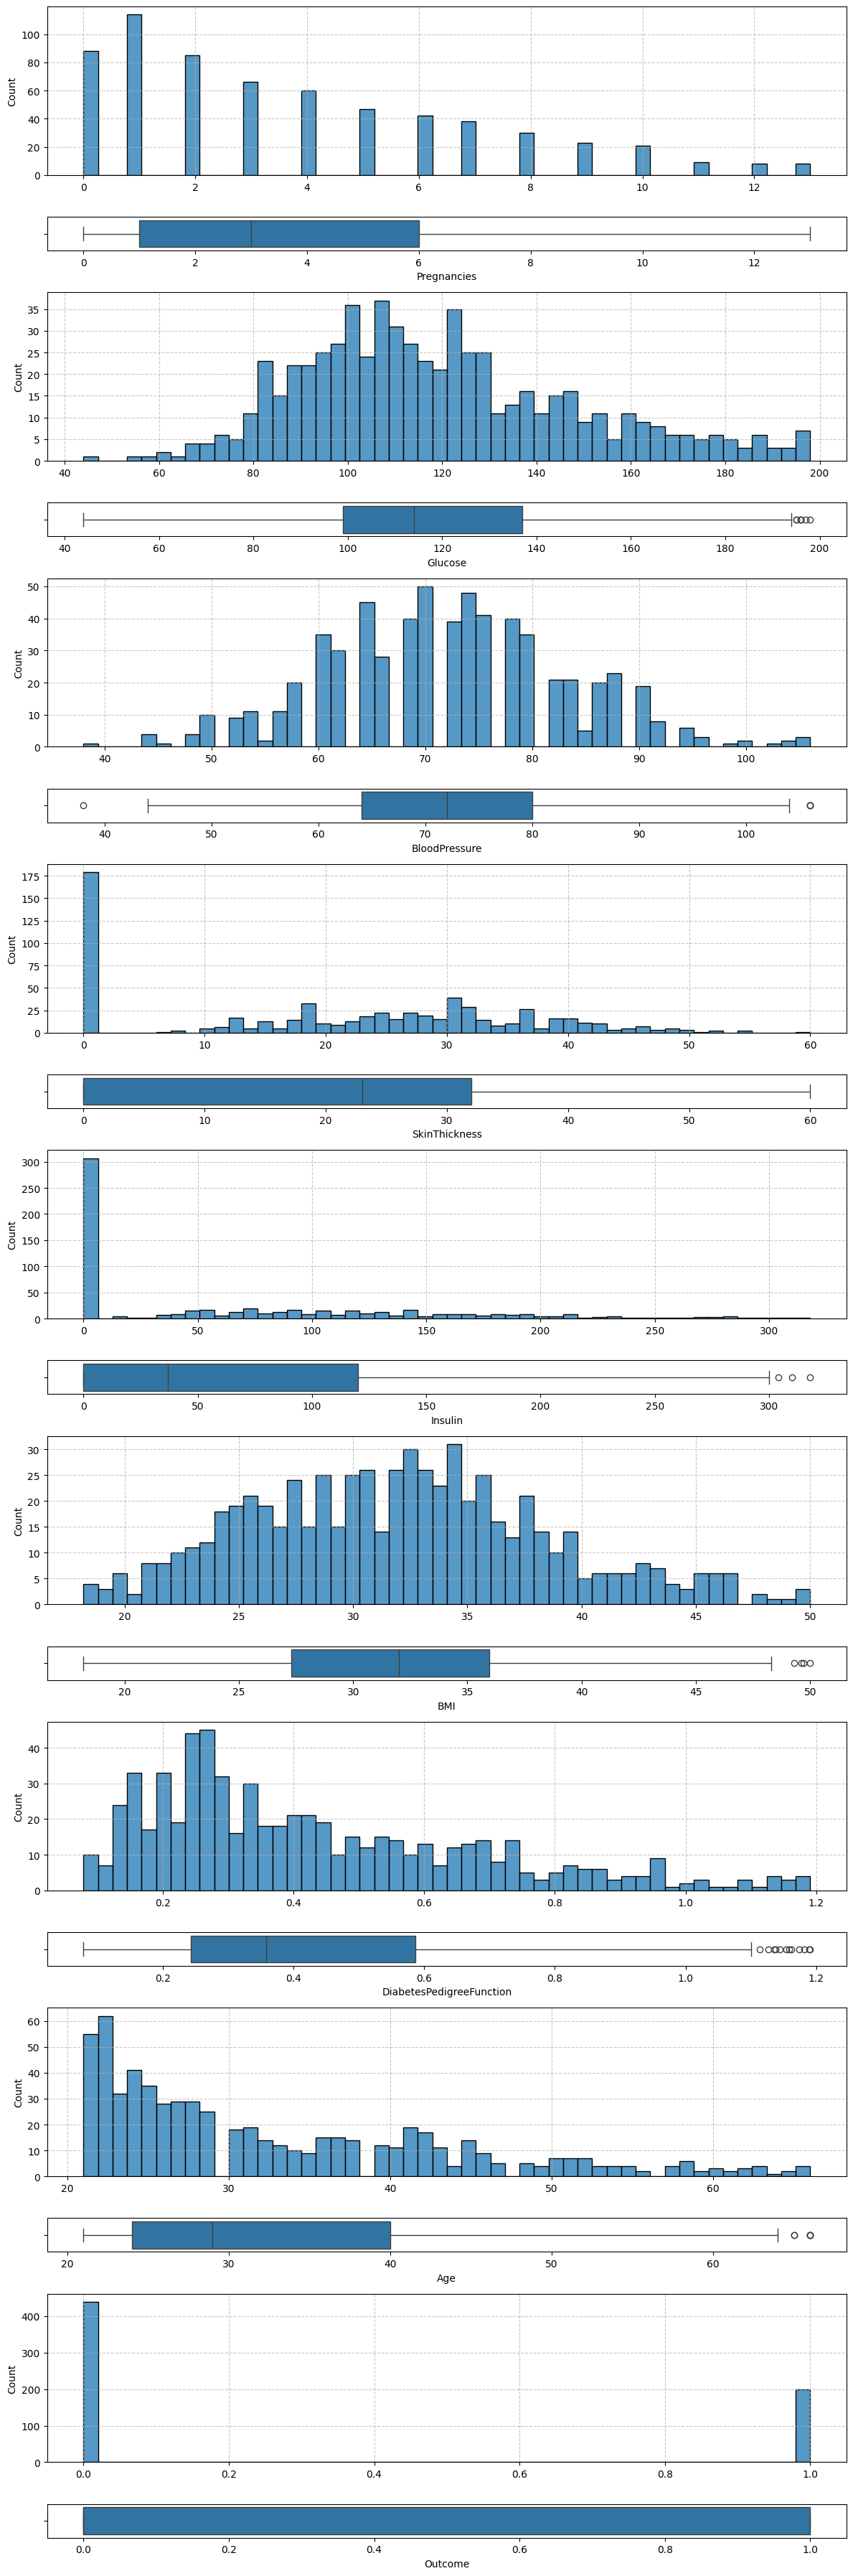

In [10]:

df_filtered_uni = filt_df.copy()
# Depending on which formula best suits my data (percentile or interquartile range)


for col in numerical_cols:
    """lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df_filtered_uni = df_filtered_uni[(df_filtered_uni[col] >= lower) & 
                                      (df_filtered_uni[col] <= upper)]
    
"""
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    df_filtered_uni = df_filtered_uni[(df_filtered_uni[col] >= Q1 - 1.5 * IQR) & 
                                      (df_filtered_uni[col] <= Q3 + 1.5 * IQR)]



fig, axes = plt.subplots(
    nrows=len(numerical_cols)*2, 
    ncols=1, 
    figsize=(12, 4*len(numerical_cols)),
    gridspec_kw={'height_ratios':[5,1]*len(numerical_cols)}
)

for i, col in enumerate(numerical_cols):
    row_hist = i*2
    row_box = i*2 + 1

    sns.histplot(ax=axes[row_hist], data=df_filtered_uni, x=col, bins=50, kde=False).set(xlabel=None)
    axes[row_hist].grid(True, linestyle='--', alpha=0.7)

    sns.boxplot(ax=axes[row_box], data=df_filtered_uni, x=col)
    
plt.tight_layout()
plt.show()


if not numerical_cols:
    print("There are no categorical features")

**Conclusions:**

- `Pregnancies`: Most patients have between 1 and 6 pregnancies, with fewer patients having many pregnancies. Some extreme values appear, but they are relatively rare.

- `Glucose`: Glucose levels show a right-skewed distribution, with a large concentration of values in the normal/medium range and some high outliers indicating potential diabetes risk.

- `BloodPressure`: Blood pressure values are roughly normally distributed but slightly right-skewed, with a few outliers at both low and high extremes.

- `BMI`: BMI shows a roughly normal distribution but slightly skewed to the right, with most patients in typical health-related ranges; some high BMI outliers exist.

- `DiabetesPedigreeFunction` : This variable is right-skewed, with most patients clustered at lower values and a few extreme cases potentially indicating genetic risk factors.

- `Age` : Age distribution is concentrated between 25 and 40 years, with fewer patients at higher ages; some outliers exist at the oldest ages.

- `Outcome` : As expected for a binary target, the values ​​are 0 (non-diabetic) or 1 (diabetic), and approximately twice as many patients are positive for diabetes.

### Analysis multivariate 

#### Analysis Numerical-Numerical

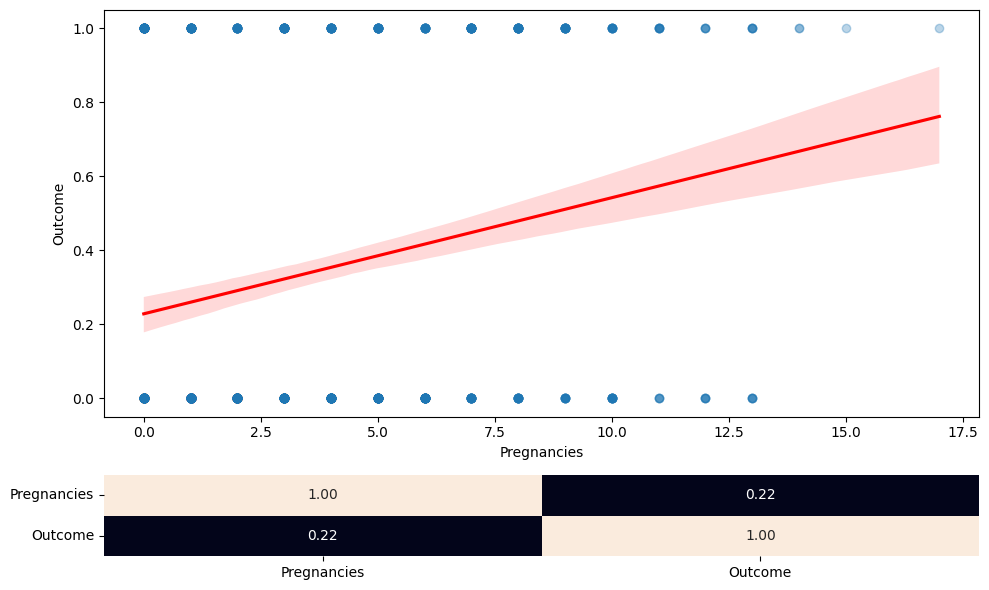

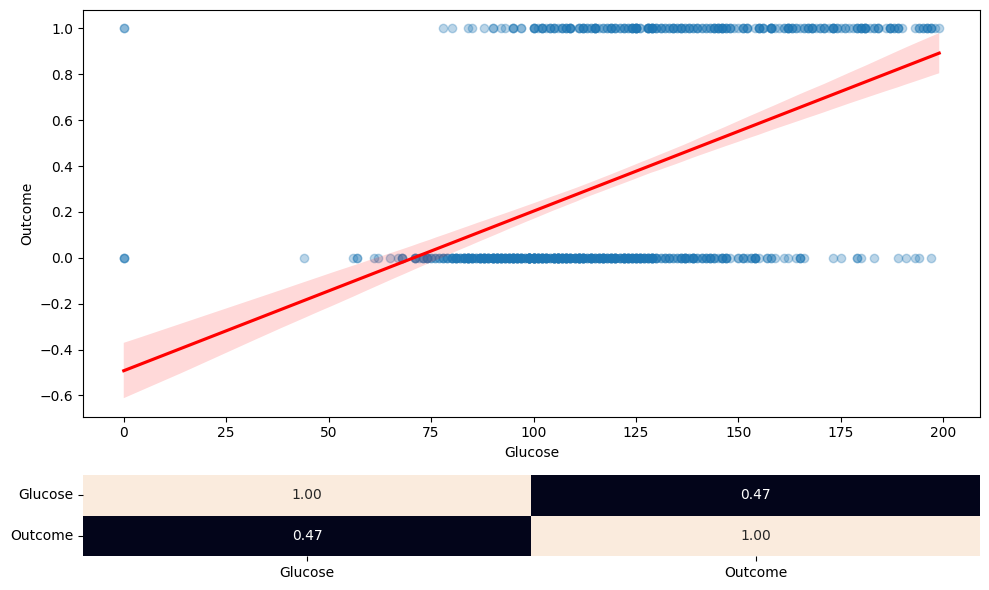

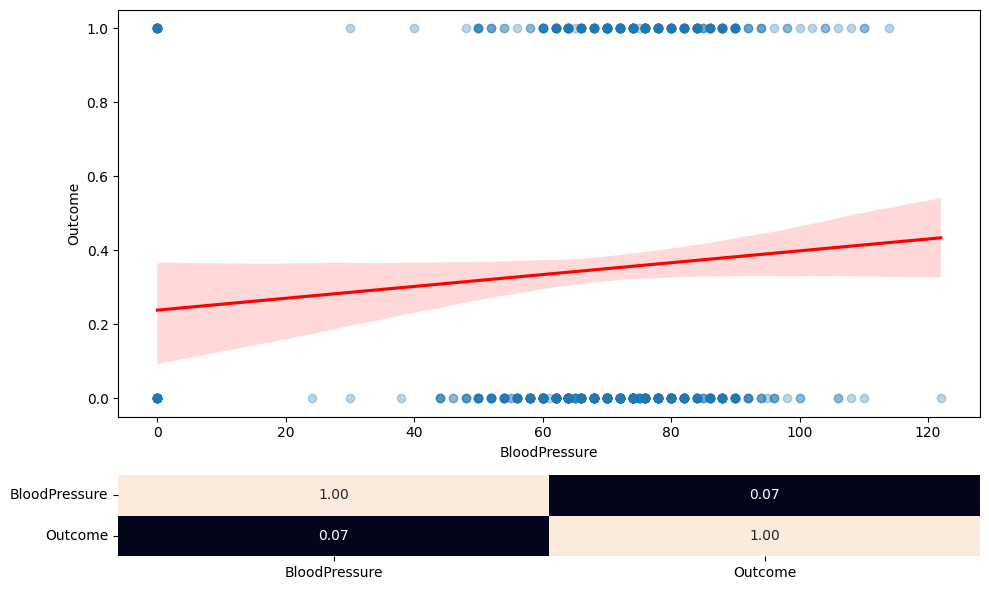

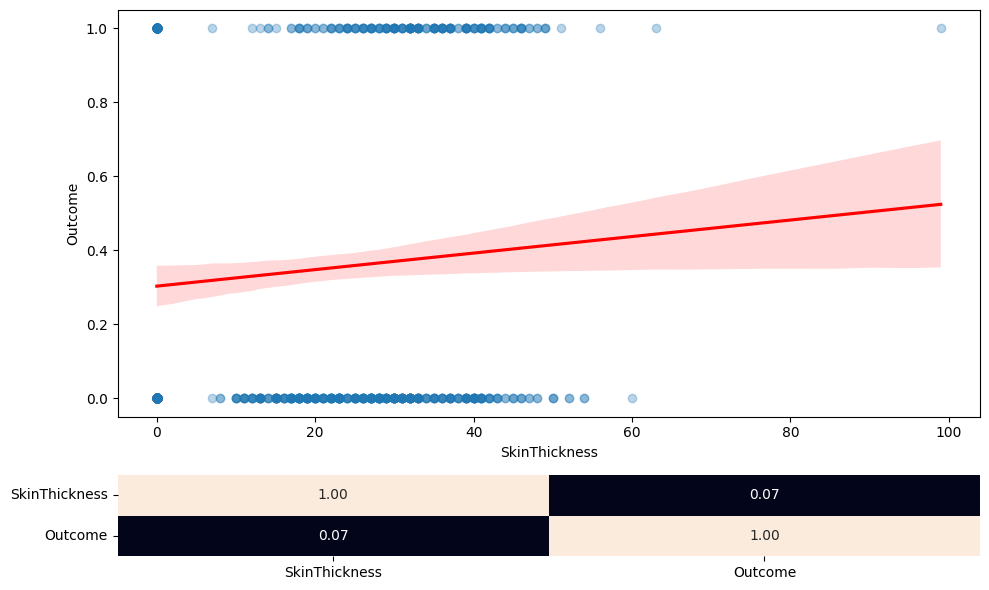

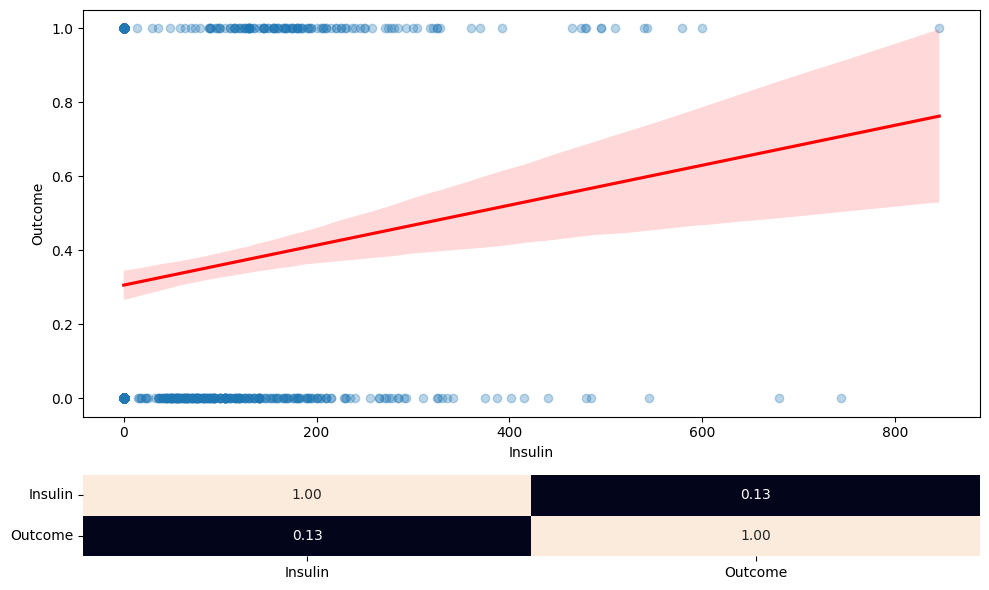

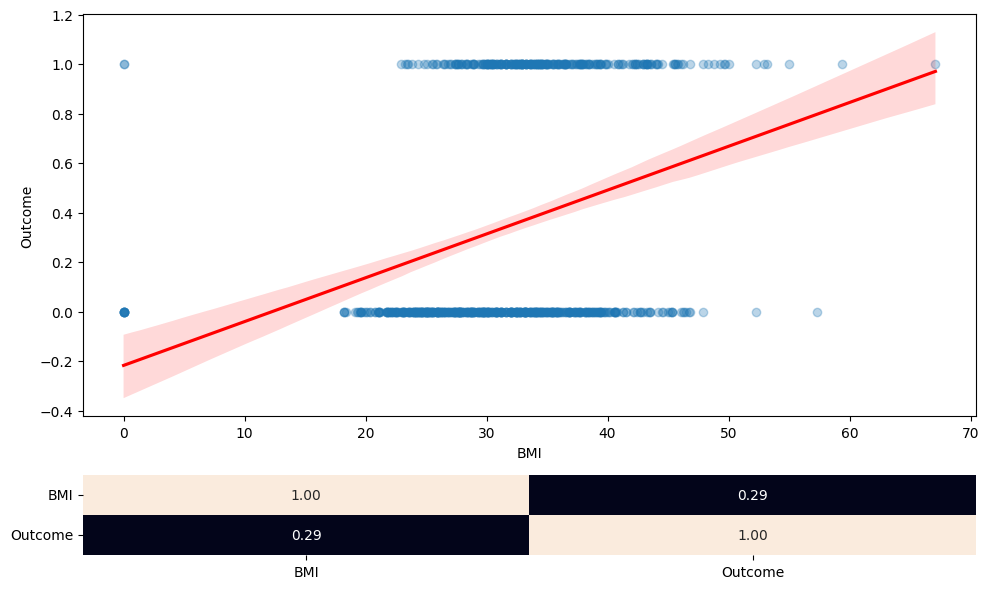

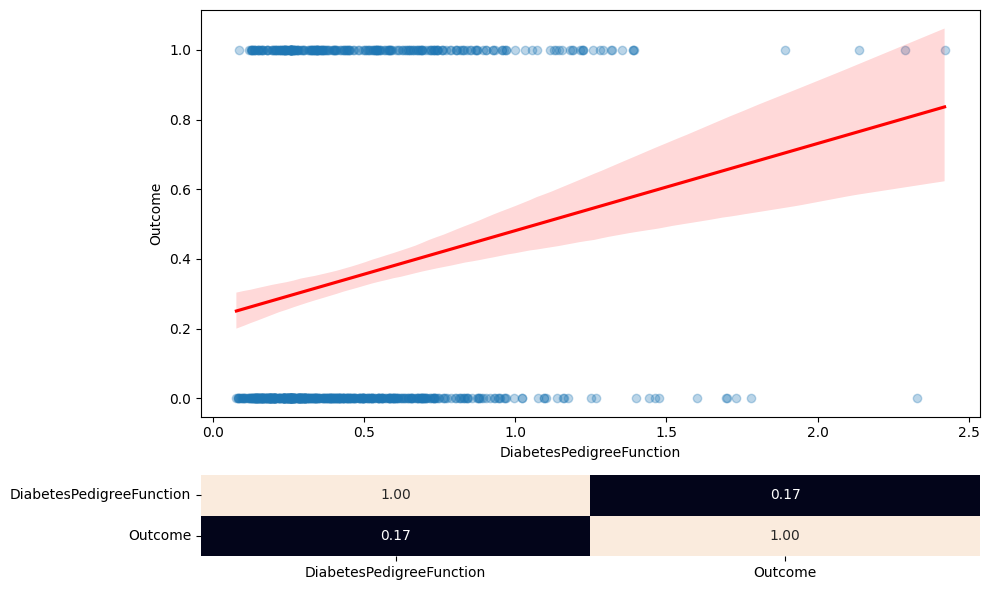

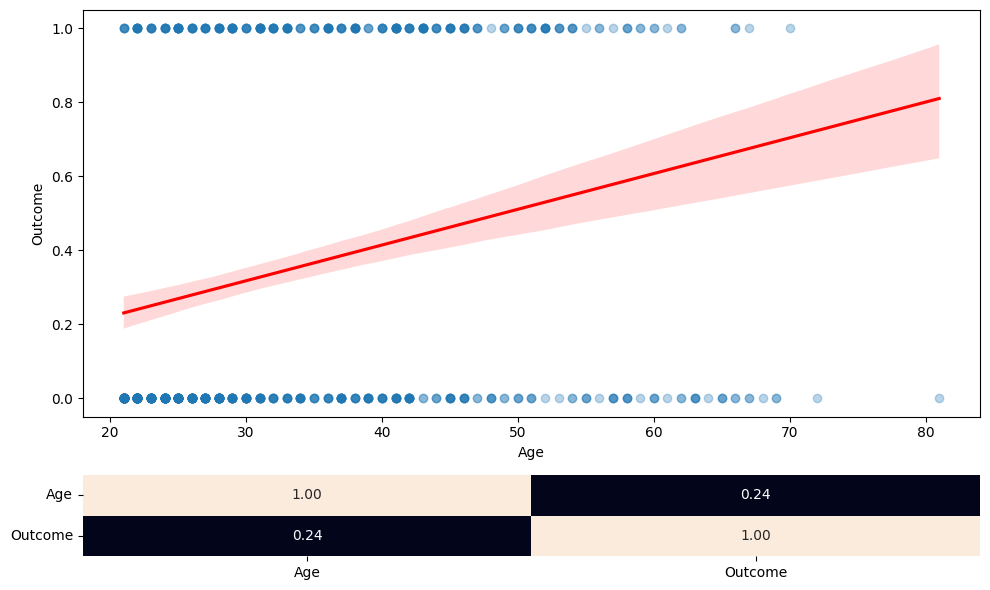

In [11]:
# total_data = factorize_categorical(filt_df)

"""
df_filtered_multi = filt_df.copy()

for col in numerical_cols:
    lower = df_filtered_multi[col].quantile(0.01)
    upper = df_filtered_multi[col].quantile(0.99)
    df_filtered_multi = df_filtered_multi[(df_filtered_multi[col] >= lower) & 
                                            (df_filtered_multi[col] <= upper)]



    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    df_filtered_multi = df_filtered_multi[(df_filtered_multi[col] >= Q1 - 1.5 * IQR) & 
                                      (df_filtered_multi[col] <= Q3 + 1.5 * IQR)]

"""

for col in numerical_cols:
    if col == target:
        continue  
    fig, axis = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios':[5,1]})

    sns.regplot(
        ax=axis[0],
        data=filt_df,
        x=col,
        y=target,
        scatter_kws={'alpha':0.3},
        line_kws={'color':'red'}
    )

    sns.heatmap(
        filt_df[[col, target]].corr(),
        annot=True,
        fmt=".2f",
        ax=axis[1],
        cbar=False
    )

    plt.tight_layout()
    plt.show()

if not numerical_cols:
    print("There are no categorical features")


**Conclusions:**

- `Glucose`: It is the variable most strongly correlated with diabetes `Outcome` with r = 0.47, indicating that high glucose levels are strongly associated with patients with diabetes. It is clearly the most important predictor in this dataset.

- `BMI`: It shows a moderate positive correlation suggesting that patients with a higher body mass index are more likely to have diabetes.

- `Age`: Older patients have a slightly higher risk of diabetes.

- `Pregnancies`: This indicates that with a greater number of pregnancies, there is a slightly higher risk of diabetes.

- `DiabetesPedigreeFunction`: It reflects that family/genetic history influences the likelihood of diabetes.

#### Analysis Categorical-Categorical

In [12]:
for col in cat_cols:
    if col == target:
        continue
    
    plt.figure(figsize=(10,5))
    sns.violinplot(
        data=filt_df,
        x=col,
        y=target,
        inner="quartile"
    )
    
    plt.title(f"{target} distribution per {col}")
    plt.ylabel(f"{target}")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


if not cat_cols:
    print("There are no categorical features")

There are no categorical features


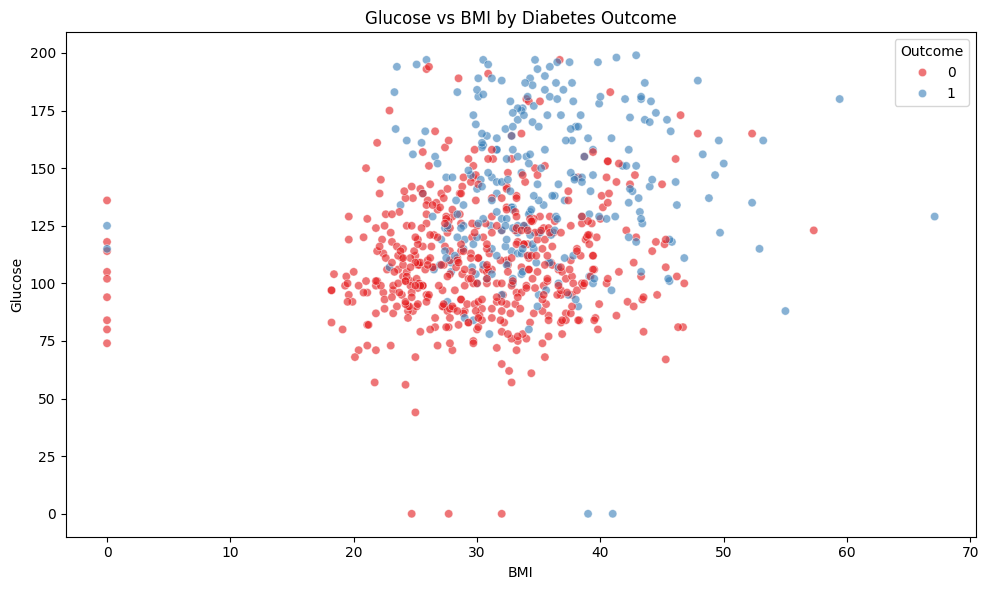

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=filt_df,
    x='BMI',
    y='Glucose',
    hue='Outcome',
    palette='Set1',
    alpha=0.6
)
plt.title("Glucose vs BMI by Diabetes Outcome")
plt.xlabel("BMI")
plt.ylabel("Glucose")
plt.legend(title="Outcome")
plt.tight_layout()
plt.show()


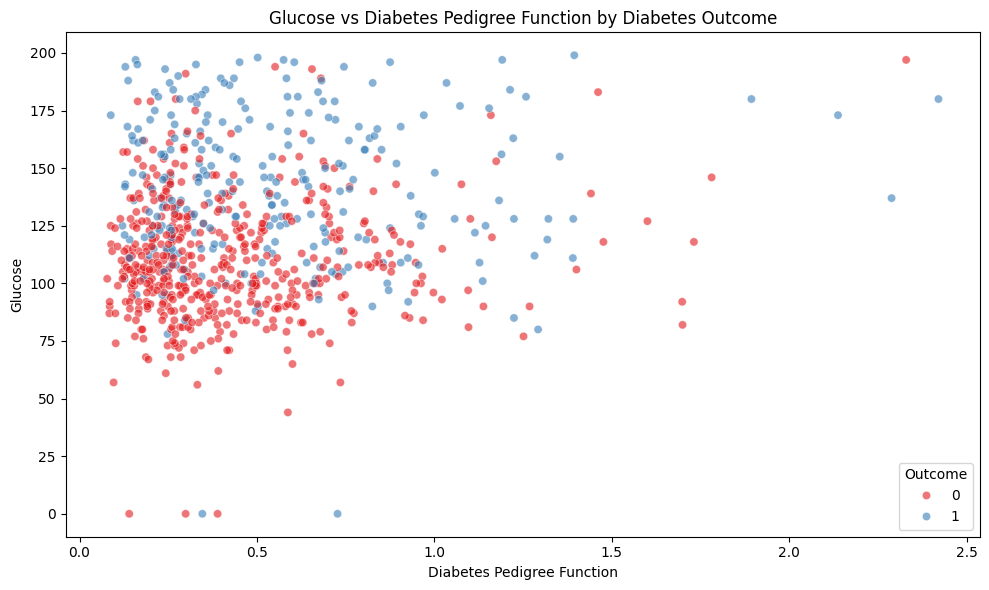

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=filt_df,
    x='DiabetesPedigreeFunction',
    y='Glucose',
    hue='Outcome',
    palette='Set1',
    alpha=0.6
)
plt.title("Glucose vs Diabetes Pedigree Function by Diabetes Outcome")
plt.xlabel("Diabetes Pedigree Function")
plt.ylabel("Glucose")
plt.legend(title="Outcome")
plt.tight_layout()
plt.show()


**Conclusions:**
- Elevated glucose levels are strongly associated with diabetes, particularly in individuals who also have a high BMI.

- Higher values of the Diabetes Pedigree Function increase the likelihood of diabetes, especially when accompanied by elevated glucose.

#### Correlation matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [45]:
total_data = factorize_categorical(filt_df)

No categorical columns found. Returning original DataFrame copy.


In [46]:
print(total_data.corr())

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

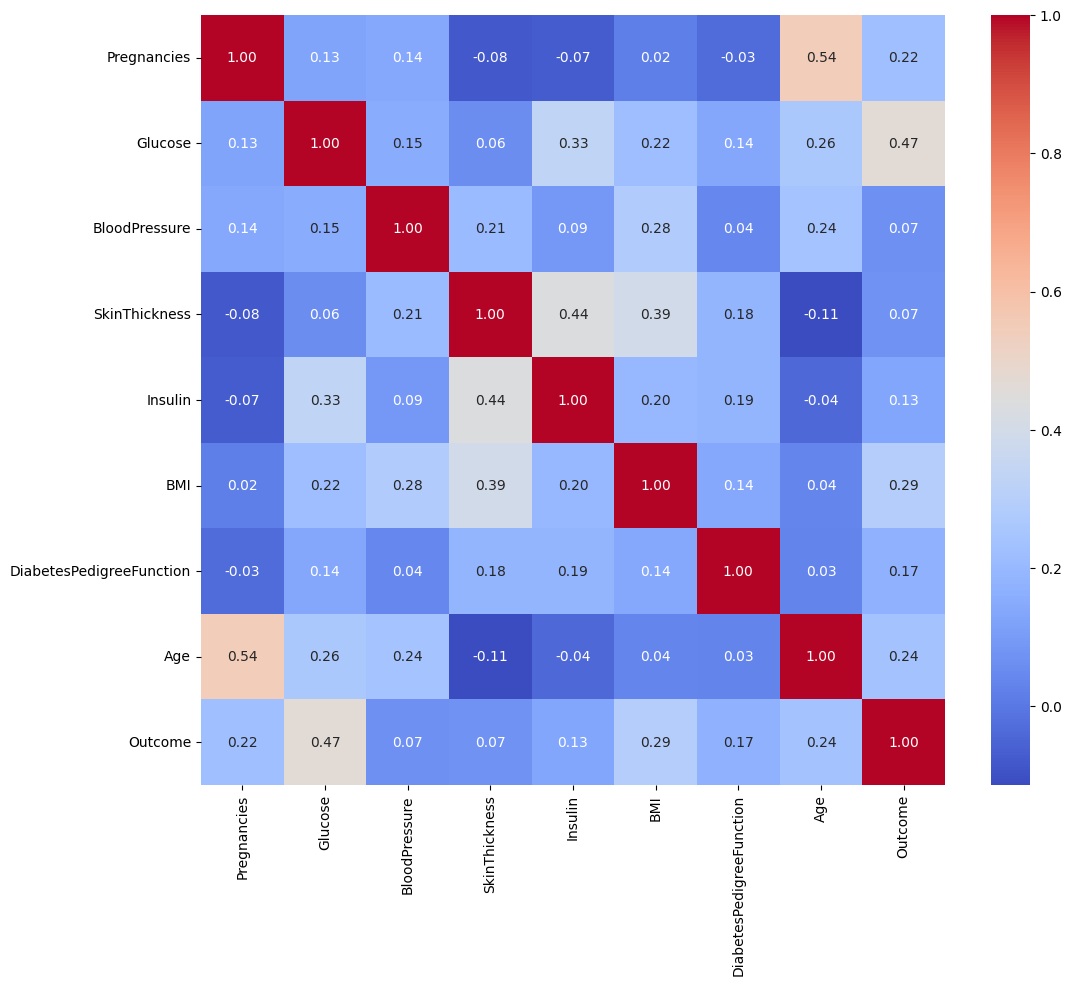

In [44]:
plot_correlation_heatmap(total_data)

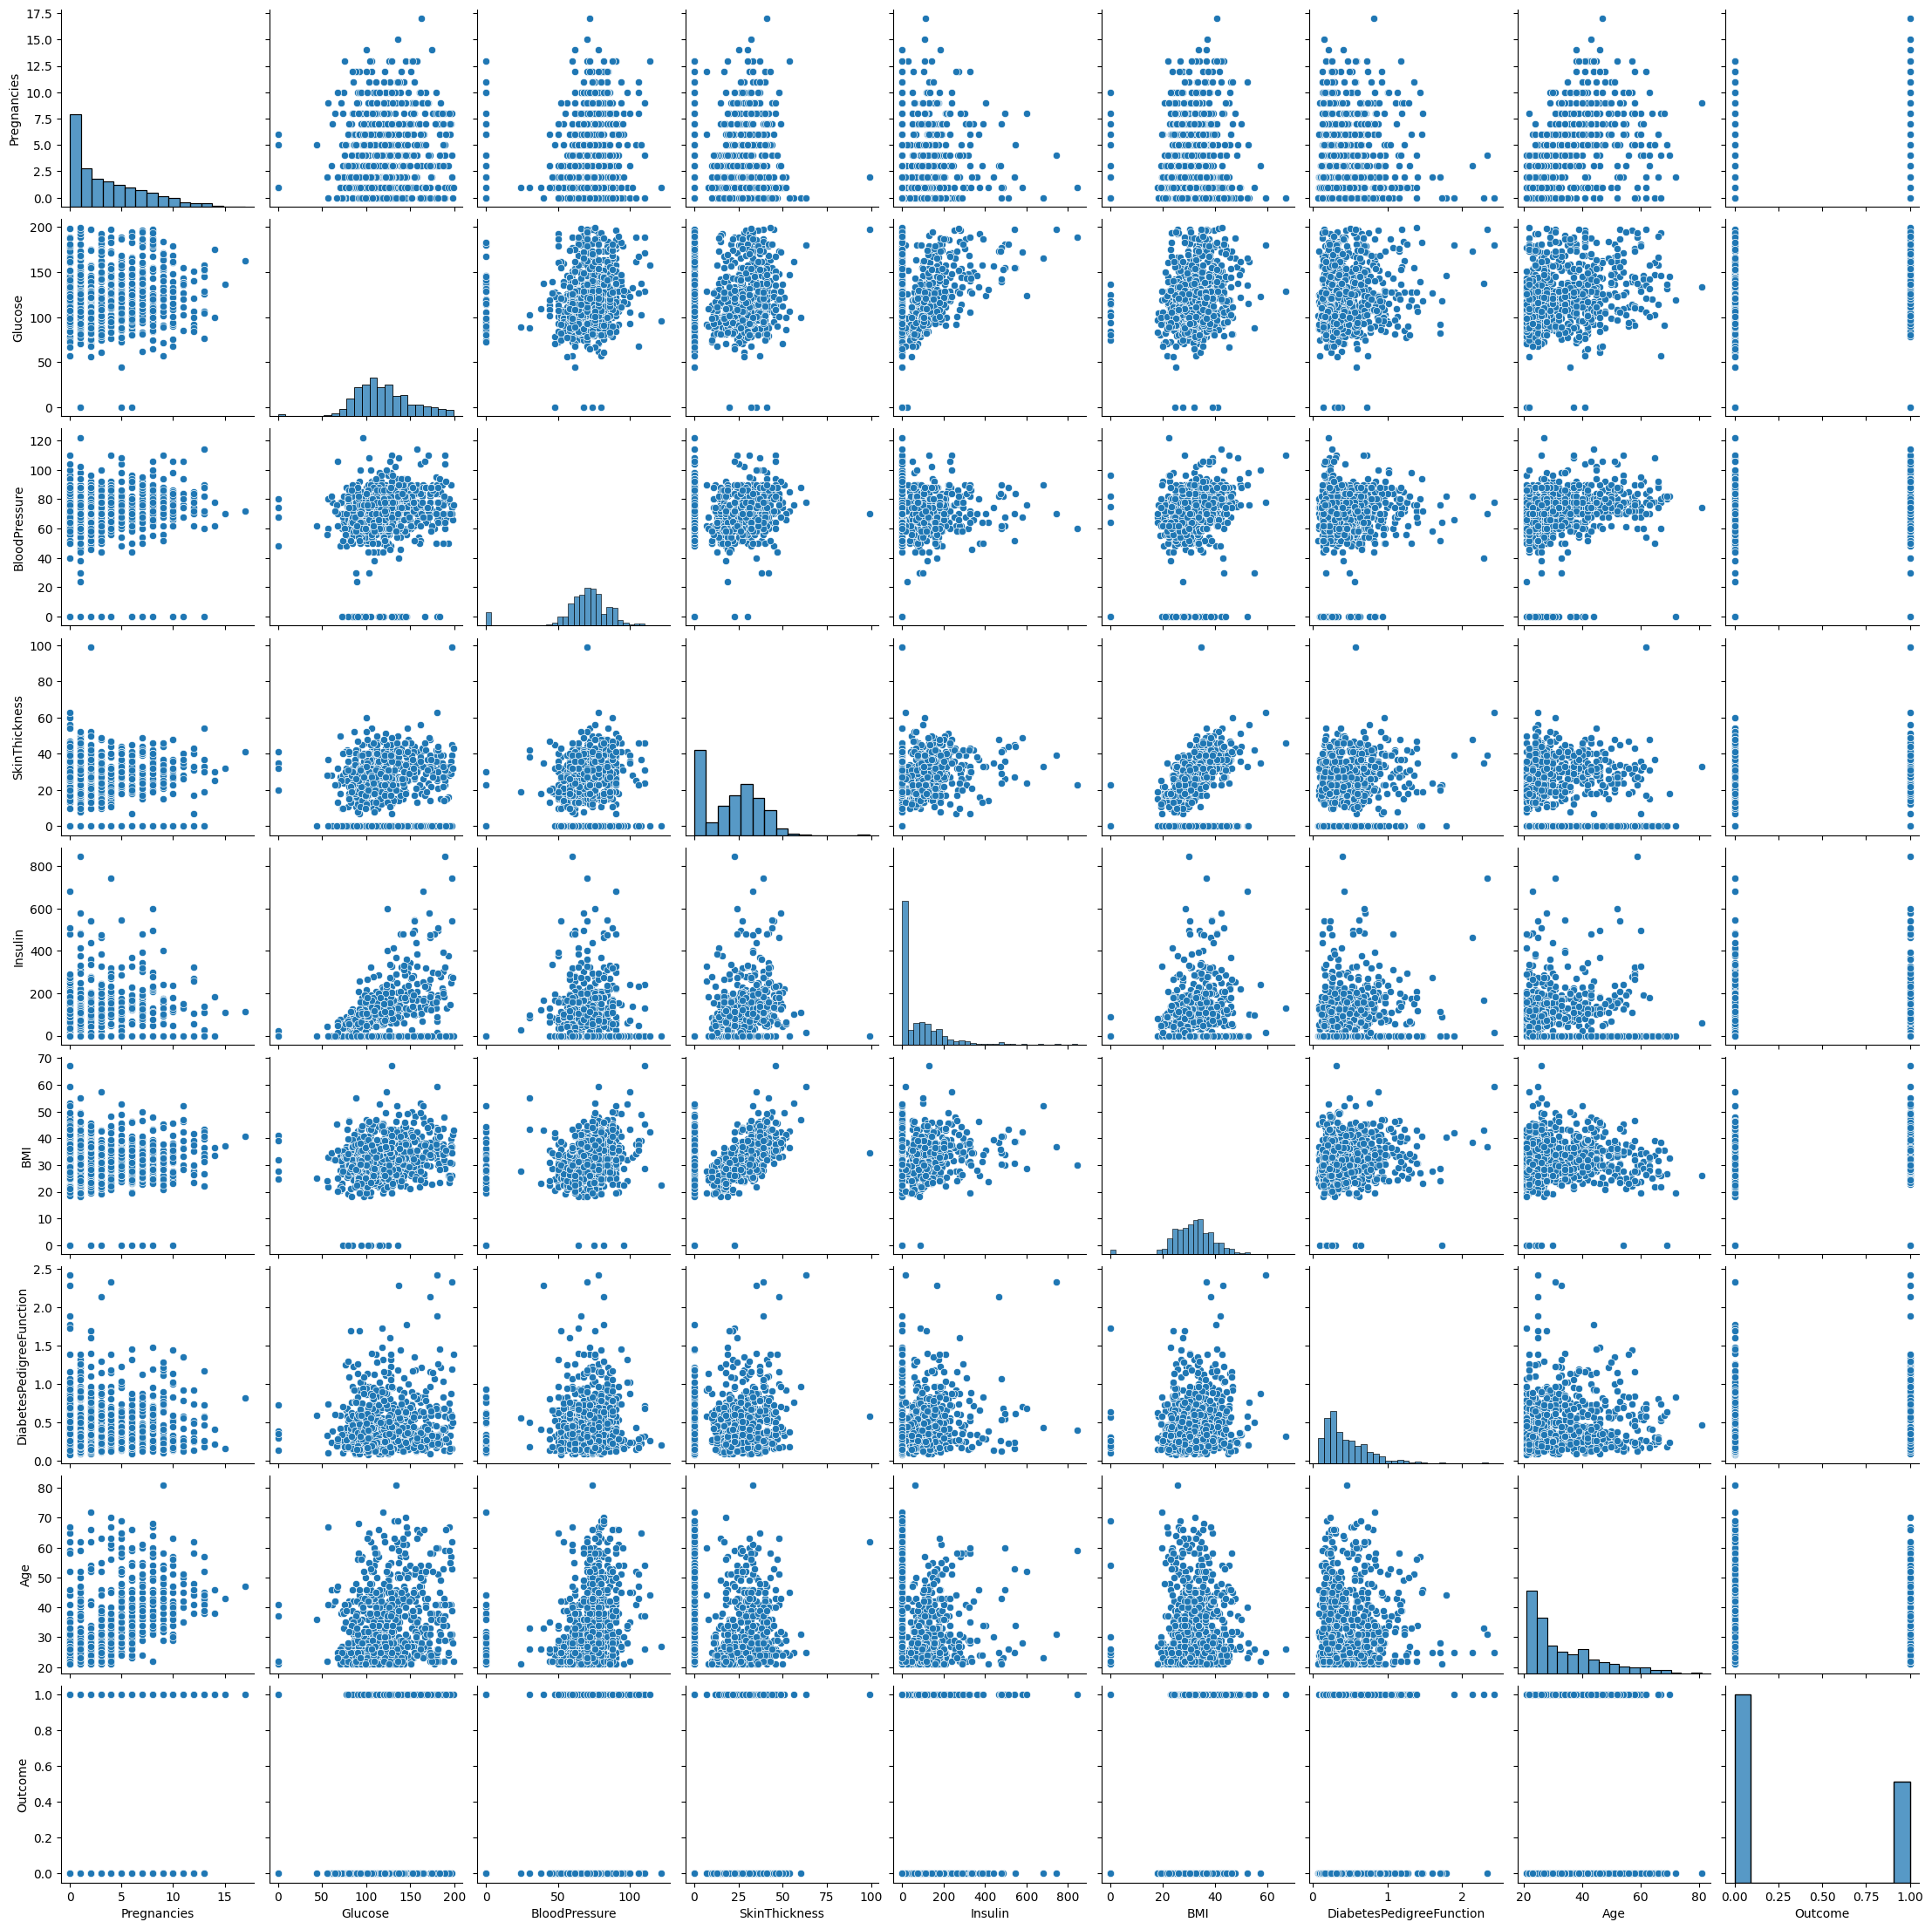

In [16]:
sns.pairplot(data = total_data)

### Featuure engineering

#### Outliers analysis

In [17]:
# Drop categoricals variables

FINAL_COLS = total_data.select_dtypes(include='object').columns.tolist()
total_data = total_data.drop(columns=FINAL_COLS)

total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


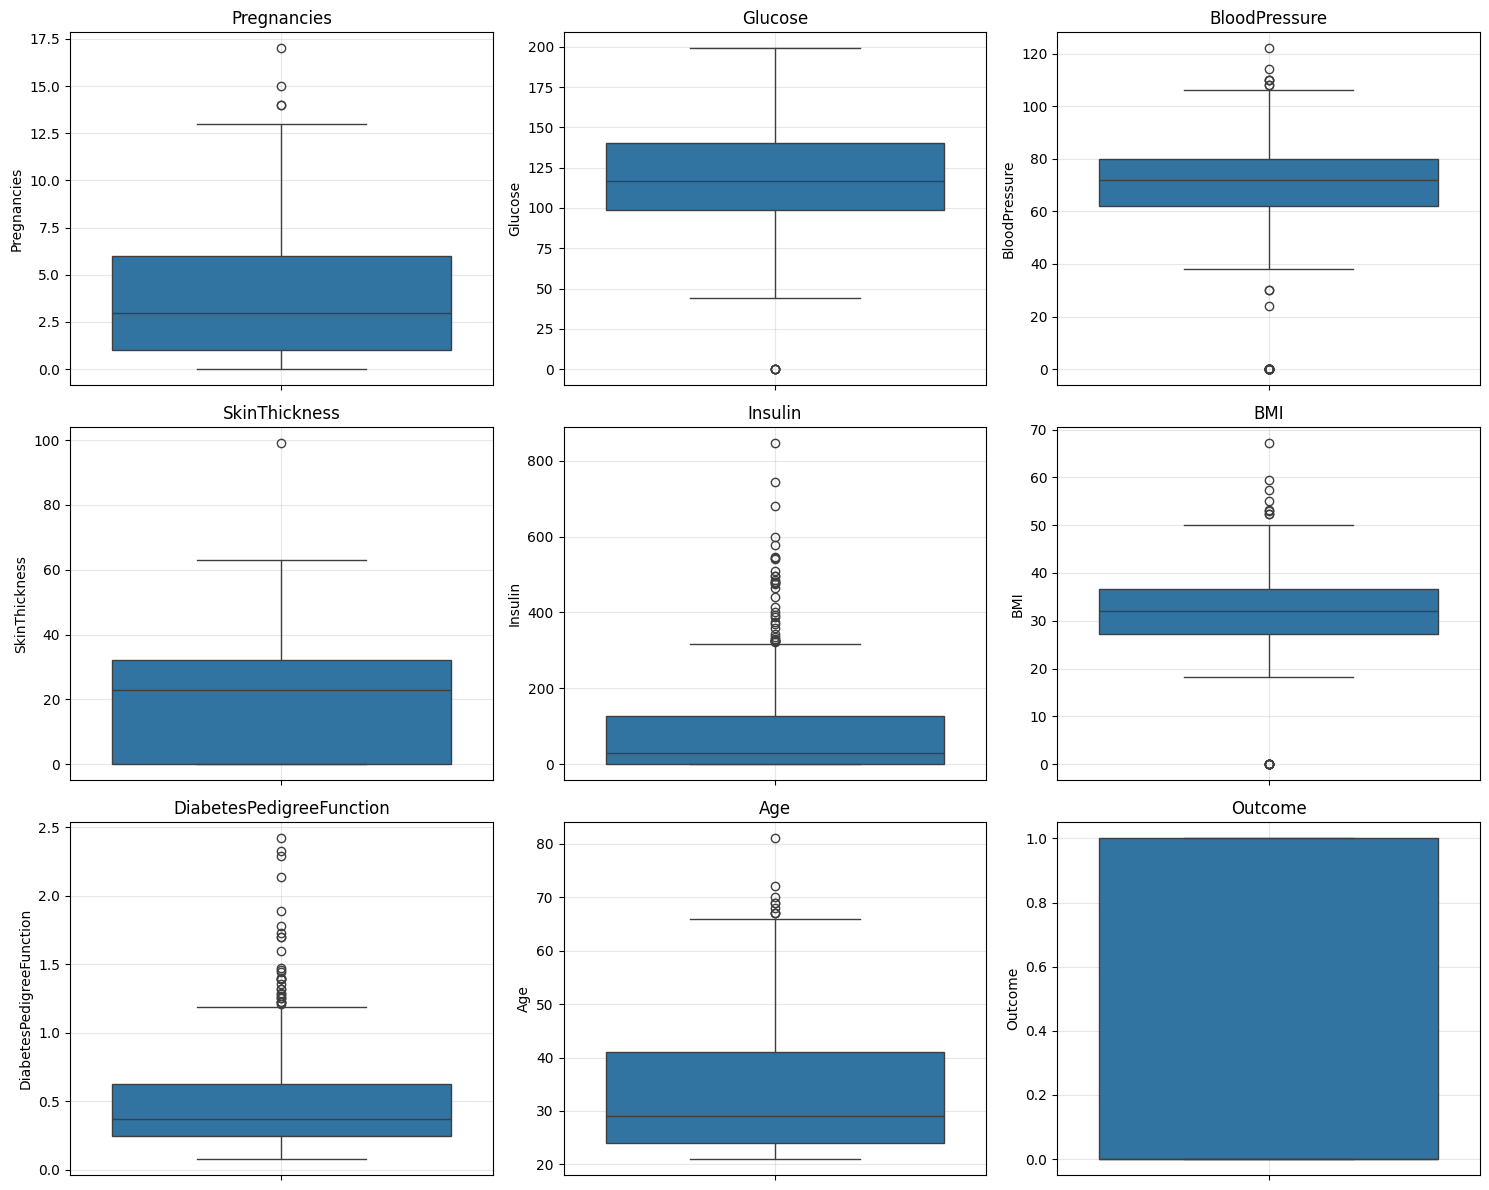

In [18]:
def plot_boxplots(
    df,
    cols=None,
    n_cols=3,
    figsize_per_plot=(5, 4)
):

    if cols is None:
        cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

    n_plots = len(cols)
    n_rows = math.ceil(n_plots / n_cols)

    fig, axes = plt.subplots(
        n_rows,
        n_cols,
        figsize=(figsize_per_plot[0] * n_cols,
                 figsize_per_plot[1] * n_rows)
    )

    axes = axes.flatten()

    for i, col in enumerate(cols):
        sns.boxplot(
            ax=axes[i],
            data=df,
            y=col
        )
        axes[i].set_title(col)
        axes[i].grid(alpha=0.3)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_boxplots(total_data)

#### Cap outliers variables and save JSON

In [19]:
total_data_with_outliers = total_data.copy()
total_data_without_outliers = total_data.copy()


outliers_cols = [col for col in numerical_cols if col != target]

outliers_dict = {}

for column in outliers_cols:
  total_data_without_outliers, limits = replace_outliers(column, total_data_without_outliers)
  outliers_dict[column] = limits

outliers_dict
with open("../data/interim/outliers_dict.json", "w") as f:
  json.dump(outliers_dict, f)


4 values clipped in Pregnancies
Lower limit: 0, Upper limit: 13.5, IQR: 5.0

5 values clipped in Glucose
Lower limit: 37.125, Upper limit: 202.125, IQR: 41.25

45 values clipped in BloodPressure
Lower limit: 35.0, Upper limit: 107.0, IQR: 18.0

1 values clipped in SkinThickness
Lower limit: 0, Upper limit: 80.0, IQR: 32.0

34 values clipped in Insulin
Lower limit: 0, Upper limit: 318.125, IQR: 127.25

19 values clipped in BMI
Lower limit: 13.35, Upper limit: 50.550000000000004, IQR: 9.3

29 values clipped in DiabetesPedigreeFunction
Lower limit: 0.078, Upper limit: 1.2, IQR: 0.38249999999999995

9 values clipped in Age
Lower limit: 21, Upper limit: 66.5, IQR: 17.0


#### Missing values analysis

In [20]:
total_data_with_outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
print("TOTAL_DATA_WITH_OUTLIERS:\n")
check_missing_values(total_data_with_outliers)

TOTAL_DATA_WITH_OUTLIERS:

No missing values were found in the dataset.


""


In [22]:
print("TOTAL_DATA_WITHOUT_OUTLIERS:\n")
check_missing_values(total_data_without_outliers)

TOTAL_DATA_WITHOUT_OUTLIERS:

No missing values were found in the dataset.


""


Since we don't have any null values ​​in the dataset, we skip this step.

In [23]:
"""median_cols = [

]

mean_cols = [

]

mode_cols = [
    "job_n", "education_n", "marital_n", "default_n", "housing_n", "loan_n"
]


total_data_with_outliers = fill_missing_values(total_data_with_outliers, median_cols= median_cols, mode_cols= mode_cols, mean_cols= mean_cols)

total_data_without_outliers = fill_missing_values(total_data_without_outliers, median_cols= median_cols, mode_cols= mode_cols, mean_cols= mean_cols)

print("TOTAL_DATA_WITH_OUTLIERS:\n")
check_missing_values(total_data_with_outliers)"""

'median_cols = [\n\n]\n\nmean_cols = [\n\n]\n\nmode_cols = [\n    "job_n", "education_n", "marital_n", "default_n", "housing_n", "loan_n"\n]\n\n\ntotal_data_with_outliers = fill_missing_values(total_data_with_outliers, median_cols= median_cols, mode_cols= mode_cols, mean_cols= mean_cols)\n\ntotal_data_without_outliers = fill_missing_values(total_data_without_outliers, median_cols= median_cols, mode_cols= mode_cols, mean_cols= mean_cols)\n\nprint("TOTAL_DATA_WITH_OUTLIERS:\n")\ncheck_missing_values(total_data_with_outliers)'

In [24]:
print("TOTAL_DATA_WITHOUT_OUTLIERS:\n")
check_missing_values(total_data_without_outliers)

TOTAL_DATA_WITHOUT_OUTLIERS:

No missing values were found in the dataset.


""


#### Inference of new features

In [25]:
"""merge = "total_loan"
first_element = "housing_n"
second_element = "loan_n"

total_data_with_outliers, total_data_without_outliers = merge_columns(total_data_with_outliers, total_data_without_outliers, merge, first_element, second_element)

total_data_with_outliers.drop(["housing_n", "loan_n"], axis = 1, inplace = True)
total_data_without_outliers.drop(["housing_n", "loan_n"], axis = 1, inplace = True)

total_data_with_outliers.head()"""

'merge = "total_loan"\nfirst_element = "housing_n"\nsecond_element = "loan_n"\n\ntotal_data_with_outliers, total_data_without_outliers = merge_columns(total_data_with_outliers, total_data_without_outliers, merge, first_element, second_element)\n\ntotal_data_with_outliers.drop(["housing_n", "loan_n"], axis = 1, inplace = True)\ntotal_data_without_outliers.drop(["housing_n", "loan_n"], axis = 1, inplace = True)\n\ntotal_data_with_outliers.head()'

In [26]:
total_data_without_outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0,1


### Feature Scaling
#### Split train and test

In [27]:
predictors = total_data_with_outliers.columns.drop(target)

X_WITH_outliers = total_data_with_outliers[predictors]
X_WITHOUT_outliers = total_data_without_outliers[predictors]
y = total_data_with_outliers[target]

X_train_WITH_outliers, X_test_WITH_outliers, y_train, y_test = train_test_split(X_WITH_outliers, y, test_size = 0.2, random_state = 10)
X_train_WITHOUT_outliers, X_test_WITHOUT_outliers = train_test_split(X_WITHOUT_outliers, test_size = 0.2, random_state = 10)

#### Normalization
##### With outliers

In [28]:
norm_WITH_outliers = StandardScaler()
norm_WITH_outliers.fit(X_train_WITH_outliers)

X_train_WITH_outliers_norm = norm_WITH_outliers.transform(X_train_WITH_outliers)
X_train_WITH_outliers_norm = pd.DataFrame(X_train_WITH_outliers_norm, index = X_train_WITH_outliers.index, columns = predictors)

X_test_WITH_outliers_norm = norm_WITH_outliers.transform(X_test_WITH_outliers)
X_test_WITH_outliers_norm = pd.DataFrame(X_test_WITH_outliers_norm, index = X_test_WITH_outliers.index, columns = predictors)

##### Without outliers

In [29]:
norm_WITHOUT_outliers = StandardScaler()
norm_WITHOUT_outliers.fit(X_train_WITHOUT_outliers)

X_train_WITHOUT_outliers_norm = norm_WITHOUT_outliers.transform(X_train_WITHOUT_outliers)
X_train_WITHOUT_outliers_norm = pd.DataFrame(X_train_WITHOUT_outliers_norm, index = X_train_WITHOUT_outliers.index, columns = predictors)

X_test_WITHOUT_outliers_norm = norm_WITHOUT_outliers.transform(X_test_WITHOUT_outliers)
X_test_WITHOUT_outliers_norm = pd.DataFrame(X_test_WITHOUT_outliers_norm, index = X_test_WITHOUT_outliers.index, columns = predictors)

#### Min-Max Scaling
##### With outliers

In [30]:
scaler_WITH_outliers = MinMaxScaler()
scaler_WITH_outliers.fit(X_train_WITH_outliers)

X_train_WITH_outliers_scal = scaler_WITH_outliers.transform(X_train_WITH_outliers)
X_train_WITH_outliers_scal = pd.DataFrame(X_train_WITH_outliers_scal, index = X_train_WITH_outliers.index, columns = predictors)

X_test_WITH_outliers_scal = scaler_WITH_outliers.transform(X_test_WITH_outliers)
X_test_WITH_outliers_scal = pd.DataFrame(X_test_WITH_outliers_scal, index = X_test_WITH_outliers.index, columns = predictors)

##### Without outliers

In [31]:
scaler_WITHOUT_outliers = MinMaxScaler()
scaler_WITHOUT_outliers.fit(X_train_WITHOUT_outliers)

X_train_WITHOUT_outliers_scal = scaler_WITHOUT_outliers.transform(X_train_WITHOUT_outliers)
X_train_WITHOUT_outliers_scal = pd.DataFrame(X_train_WITHOUT_outliers_scal, index = X_train_WITHOUT_outliers.index, columns = predictors)

X_test_WITHOUT_outliers_scal = scaler_WITHOUT_outliers.transform(X_test_WITHOUT_outliers)
X_test_WITHOUT_outliers_scal = pd.DataFrame(X_test_WITHOUT_outliers_scal, index = X_test_WITHOUT_outliers.index, columns = predictors)

### SAVE FILES

In [32]:
X_train_WITH_outliers.to_excel("../data/processed/X_train_WITH_outliers.xlsx", index = False)
X_train_WITH_outliers_norm.to_excel("../data/processed/X_train_WITH_outliers_norm.xlsx", index = False)
X_train_WITH_outliers_scal.to_excel("../data/processed/X_train_WITH_outliers_scal.xlsx", index = False)
X_train_WITHOUT_outliers.to_excel("../data/processed/X_train_WITHOUT_outliers.xlsx", index = False)
X_train_WITHOUT_outliers_norm.to_excel("../data/processed/X_train_WITHOUT_outliers_norm.xlsx", index = False)
X_train_WITHOUT_outliers_scal.to_excel("../data/processed/X_train_WITHOUT_outliers_scal.xlsx", index = False)

X_test_WITH_outliers.to_excel("../data/processed/X_test_WITH_outliers.xlsx", index = False)
X_test_WITH_outliers_norm.to_excel("../data/processed/X_test_WITH_outliers_norm.xlsx", index = False)
X_test_WITH_outliers_scal.to_excel("../data/processed/X_test_WITH_outliers_scal.xlsx", index = False)
X_test_WITHOUT_outliers.to_excel("../data/processed/X_test_WITHOUT_outliers.xlsx", index = False)
X_test_WITHOUT_outliers_norm.to_excel("../data/processed/X_test_WITHOUT_outliers_norm.xlsx", index = False)
X_test_WITHOUT_outliers_scal.to_excel("../data/processed/X_test_WITHOUT_outliers_scal.xlsx", index = False)

y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)

with open("../models/norm_WITH_outliers.pkl", "wb") as file:
  pickle.dump(norm_WITH_outliers, file)
with open("../models/norm_WITHOUT_outliers.pkl", "wb") as file:
  pickle.dump(norm_WITHOUT_outliers, file)
with open("../models/scaler_WITH_outliers.pkl", "wb") as file:
  pickle.dump(scaler_WITH_outliers, file)
with open("../models/scaler_WITHOUT_outliers.pkl", "wb") as file:
  pickle.dump(scaler_WITHOUT_outliers, file)

### Feature selection

In [39]:
X_train = X_train_WITH_outliers.copy()
X_test = X_test_WITH_outliers.copy()

k_features = 8

selection_model = SelectKBest(f_classif, k = k_features)
selection_model.fit(X_train, y_train)

ix = selection_model.get_support()

selected_features = X_train.columns[ix]

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

print("Total number of features:", X_train.shape[1])
print("Features selected:", len(selected_features))

X_train_sel.head()

Total number of features: 8
Features selected: 8


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.0,162.0,76.0,56.0,100.0,53.2,0.759,25.0
1,2.0,87.0,0.0,23.0,0.0,28.9,0.773,25.0
2,0.0,137.0,68.0,14.0,148.0,24.8,0.143,21.0
3,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0
4,0.0,104.0,64.0,37.0,64.0,33.6,0.510,22.0
